<a href="https://colab.research.google.com/github/hablix/Raumakustik/blob/main/BerechnungRaumakustik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Berechnungsskript für Raumakustikprojekt

Hannes Bischoff



In [1]:
print('Sitze pro Reihe = s; Anzahl Reihen = r')
r=25
s=32
P=r*s
P

Sitze pro Reihe = s; Anzahl Reihen = r


800

In [2]:
print('Länge, Breite')
lgest=r*0.9
bgest=s*0.55
lgest,bgest

Länge, Breite


(22.5, 17.6)

In [3]:
print('Grundfläche')
l = lgest + 2+ 6
b = bgest + 1 +1
A = l*b
l,b,A

Grundfläche


(30.5, 19.6, 597.8000000000001)

In [4]:
print('Volumenkennzahl nachNutzungsart')
vk=[3,4,5,7] #3..5 oder 4...7
vk

Volumenkennzahl nachNutzungsart


[3, 4, 5, 7]

In [5]:
def sm(a,b):
  return [a * x for x in b]

In [6]:
print('gewünschtesraumvolumen')
V = [P * x for x in vk]
V

gewünschtesraumvolumen


[2400, 3200, 4000, 5600]

In [7]:
print('Querschnitt / Volumenverlust durch gestühl')
Qgest = lgest*4*0.5
Vgest= Qgest*b
Qgest,Vgest

Querschnitt / Volumenverlust durch gestühl


(45.0, 882.0000000000001)

In [8]:
print('Resultiernde Deckenhöhe')
h = [(v+Vgest)/A for v in V]
h

Resultiernde Deckenhöhe


[5.490130478420876, 6.82837069253931, 8.166610906657745, 10.843091334894613]

In [9]:
print('Wandflächen')
Av = b*h[1]
Arl = l*h[1]-Qgest
Ah=b*h[1]-b*4
Adecke= l*b
Aboden_pult = b*8
lgest_diagonal=((lgest)**2+4**2)**(1/2)
Agest=lgest_diagonal*b
Av,Arl,Ah,'Decke:',Adecke,'boden:',Aboden_pult,lgest_diagonal,Agest

Wandflächen


(133.8360655737705,
 163.26530612244895,
 55.43606557377049,
 'Decke:',
 597.8000000000001,
 'boden:',
 156.8,
 22.85278976405288,
 447.9146793754365)

In [10]:
Agest+Aboden_pult

604.7146793754365

In [11]:
pip install pytexit

In [13]:
# convert experssions to latex strings
# latex string to png http://latex2png.com/

# install packet if necessary
#pip install pytexit
#from pytexit import py2tex
#input1 = input()
#print(input1)
#py2tex(input1)

In [14]:
x=[]
y=[]

In [15]:
import math

faktor_skizze = l/0.153
c_20 = 343
s_skizze = float(input('laufzeit in skize in cm'))/100
s = faktor_skizze * s_skizze
t = s / c_20

alpha = float(input('absorbtionswert'))

dL_r= 20*math.log(s,10)
dL_a = 10*math.log(1-alpha,10)
x.append(t)
y.append(dL_r+dL_a)

print('länge=',s,'m  t=',t*1000,'ms')
print('dL_r=',dL_r,'dB  dL_a=',dL_a,'dB')
print('x=',x,'ms   y=',y,'dB')




laufzeit in skize in cm4
absorbtionswert0
länge= 7.973856209150328 m  t= 23.247394195773552 ms
dL_r= 18.03336799714299 dB  dL_a= 0.0 dB
x= [0.02324739419577355] ms   y= [18.03336799714299] dB


In [16]:
s_s=[0.55,4.1,7.9,5.1,13.5,8.2,4.3,16.6,8.3,6.5,10.4]
s_d=[0,0,0.25,0.75,0.25,0.50,0.25,0.25,0.25,0.25,0.25]
s_d2=[0,0,0,0,0,0,0,0.25,0.75,0.25,0.5]

#s_s=[0.55,7.5,11.4,11.8,11.6,9.5]
#s_d=[0,0,0.25,0.75,0.25,0.5]
#s_d2=[0,0,0,0,0,0]

#s_s=[0.55,11.8,15.2,13.0,16.2,12.8,14.7]
#s_d=[0,0,0.25,0.75,0.25,0.5,0.25]
#s_d2=[0,0,0,0,0,0,0]

x = [s * faktor_skizze / c_20 /100  for s in s_s]
y_r=[20 * math.log(s * faktor_skizze / 100,10)  for s in s_s]
y_a=[10 * math.log(1-s,10)  for s in s_d]
y_a2=[10 * math.log(1-s,10)  for s in s_d2]
y= [ r - a - a2 for r, a, a2 in zip(y_r,y_a,y_a2)]

offset dB65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


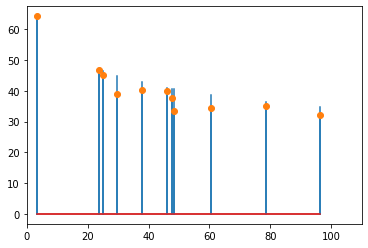

In [17]:
import matplotlib.pyplot as plt
import numpy as np


offset = int(input('offset dB'))

x_o = [1000* x_i for x_i in x]
y_o = [offset - y_i for y_i in y_r]
y_o2 = [offset - y_i for y_i in y]


fig, ax = plt.subplots()
ax.stem(x_o, y_o, markerfmt=' ')
ax.stem(x_o, y_o2, markerfmt='o')

plt.xlim([0, 110])
plt.show()